<a href="https://colab.research.google.com/github/fabioolivei/Fabio_Olivei_Data_Sciense/blob/main/Machine_Learning_e_Health_Insurance_Impacto_na_Previs%C3%A3o_de_Seguros_de_Sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>
<img src="https://cdn-images-1.medium.com/max/800/1*KptTGAdVgiKvo5VAu3x0gg.jpeg" width="%"></p>


# **Introdução**

O seguro saúde cobre o custo dos serviços médicos para indivíduos segurados, mitigando encargos financeiros associados a doenças e tratamentos médicos. O objetivo deste projeto é desenvolver um modelo de de Regressão em Machine Learning para prever o custo do Seguro de Vida, com [esses dados do Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction).


# **1. Entendimento do Negócio**

O conjunto de dados foca na previsão de custos de seguros de saúde baseada em fatores como idade, sexo, Índice de Massa Corporal (IMC), número de filhos, status de fumante e região. Entender essas relações é crucial para as seguradoras precificarem as apólices com precisão.


# **2. Entendimento dos Dados**
- O conjunto de dados inclui **1338 entradas** com **7 características:** idade, sexo, IMC, filhos, fumante, região e custos.
- Os tipos de dados são apropriados para cada característica.
* **age:**  Idades dos clientes Customer's age.
* **sex:**  Gênero Customer's gender.
* **bmi:**  IMC (Body Mass Index)
* **children:**  Se o cliente possui crianças ou não. Quantidade: ( 0 a 5 )Customer's children.
* **smoker:**  Se o cliente é fumante (Yes or No) If the customer is smoker.
* **region:** Região do cliente Customer region.
* **charges:** Custos(Variável alvo) Target...

In [5]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import plotly as plot
import warnings
warnings.filterwarnings('ignore')
sns.set_style()

# Loading data
path = "https://raw.githubusercontent.com/fabioolivei/Fabio_Olivei_Data_Sciense/main/insurance.csv"
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Data dimmension
df.shape

(1338, 7)

In [ ]:
# DataFrames columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# **3. Preparação dos Dados**
- Foi realizada uma análise descritiva dos dados
- Não há valores nulos, indicando boa qualidade dos dados.
- Uma entrada duplicada foi identificada e removida, garantindo a integridade dos dados.
* Realizou-se uma análise exploratória, através de visualizações das frequências, distribuições, e correlações


In [ ]:
# Descriptive Analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Missing Values
df.isnull().sum().sum()

0

In [ ]:
# Duplicates
duplicates = df.duplicated()
df[duplicates]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# Duplicates
df[duplicates].sum()

age                19
sex              male
bmi             30.59
children            0
smoker             no
region      northwest
charges     1639.5631
dtype: object

In [6]:
# Removing Duplicates
df.drop_duplicates(inplace = True)

## **3.1 Análise exploratória (EDA)**

*   Inclui a plotagem de gráficos obter insights através de visualizações
*   Análises da distribuição de cada coluna como sex, children(se possuem crianças ou não), smoker, region, chagers( variável alvo )
- A matriz de correlação foi analisada, fornecendo percepções iniciais sobre as relações entre variáveis.





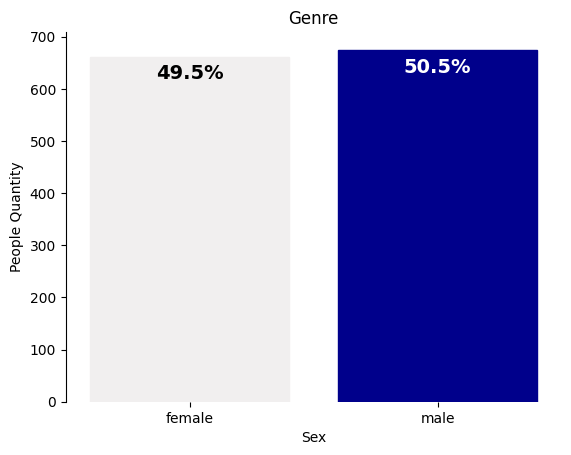

In [7]:
# Subplot
fig, ax = plt.subplots()

# Plot
ax = sns.countplot(data=df, x='sex')
plt.title('Genre')
plt.xlabel('Sex')
plt.ylabel('People Quantity')

# Colors
bar_colors = ['darkblue' if x == 'male' else '#F1EFEF' for x in df['sex'].unique()]
for bar, color in zip(ax.containers[0], bar_colors):
    bar.set_color(color)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculation
total = len(df['sex'])
for index, bar in enumerate(ax.containers[0]):  # Use enumerate to get the index
    height = bar.get_height()
    percentage = f"{100 * height / total:.1f}%"

    # Calculate the position for the text
    x_position = bar.get_x() + bar.get_width() / 2
    y_position = height - (0.05 * height)

    # Apply conditional coloring based on the index of the bar
    if index == 0:  # Left bar
        text_color = 'black'
    else:  # Right bar
        text_color = 'white'

    # Display the text
    ax.text(x_position, y_position, percentage, ha='center', va='center',
            color=text_color, fontweight='bold', fontsize=14)

plt.show()

Para o sexo feminino, a contagem é 662 e para o sexo masculino é 676. As contagens são bastante próximas, sugerindo uma distribuição quase igual entre os sexos no contexto dos dados apresentados.

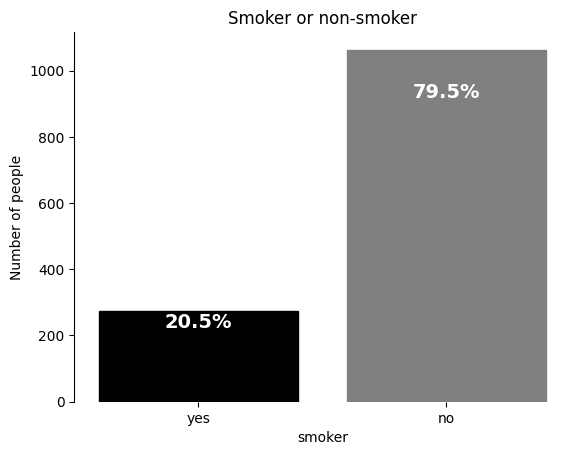

In [8]:
# subplot
fig, ax = plt.subplots()

#  seaborn
ax = sns.countplot(data=df, x='smoker')

# Colors
bar_colors = ['black' if x == 'yes' else 'gray' for x in df['smoker'].unique()]
for bar, color in zip(ax.containers[0], bar_colors):
    bar.set_color(color)

# Titles
plt.title('Smoker or non-smoker')
plt.ylabel('Number of people')

# Removen spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculation
total = len(df['smoker'])
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.text(bar.get_x() + bar.get_width() / 2, height - (0.12 * height), percentage, ha='center', va='center', color='white', fontweight='bold', fontsize=14)

plt.show()

Aqui estão alguns insights:

- **Proporção de Fumantes**: A barra correspondente aos fumantes (indicada por "yes") mostra que 20,5% das pessoas no conjunto de dados são fumantes. Isso é relevante porque ser fumante é frequentemente associado a riscos maiores de saúde e, consequentemente, a prêmios de seguro mais elevados. Essa minoria de fumantes pode impactar significativamente os custos do seguro saúde.

- **Proporção de Não Fumantes**: Por outro lado, uma grande maioria de 79,5% das pessoas são não fumantes (indicada por "no"). Isso sugere que a maior parte da população analisada pode ter um risco menor de saúde relacionado ao tabagismo, o que pode ser refletido em prêmios de seguro mais baixos para esse grupo.

- **Implicações para Previsão de Seguro**: O status de fumante é um indicador importante na previsão de seguros de saúde devido à correlação direta com condições de saúde e custos médicos. Com uma diferença tão significativa entre fumantes e não fumantes, é provável que os modelos de previsão considerem o tabagismo como uma variável significativa na determinação dos preços dos seguros.

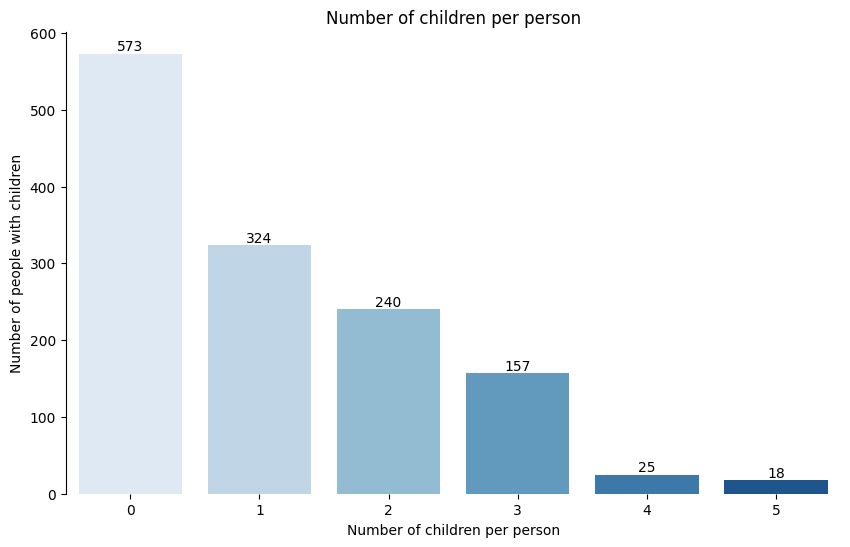

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['children'], palette ='Blues')
plt.title('Number of children per person')
plt.xlabel('Number of children per person')
plt.ylabel('Number of people with children')

for i in ax.containers:
  ax.bar_label(i)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Segue uma análise detalhada dos dados apresentados no gráfico:

- **Sem crianças (0)**: A maior barra representa 573 pessoas sem crianças, o que é significativamente maior do que as outras categorias. Isso sugere que a maioria das pessoas no conjunto de dados não tem filhos, o que pode influenciar o custo do seguro saúde, já que indivíduos sem dependentes podem ter prêmios mais baixos.
  
- **Uma criança (1)**: A segunda maior barra mostra 324 pessoas com uma criança. Este número é quase a metade do número de pessoas sem filhos, indicando que ter um filho é relativamente comum, mas muito menos do que não ter nenhum.
  
- **Duas crianças (2)**: Com 240 pessoas, a frequência diminui ainda mais para aqueles com dois filhos.
  
- **Três crianças (3)**: Há uma queda acentuada para 157 pessoas com três filhos
  
- **Quatro crianças (4)** e **cinco crianças (5)**: Estas categorias têm as menores frequências, com 25 e 18 pessoas, respectivamente.

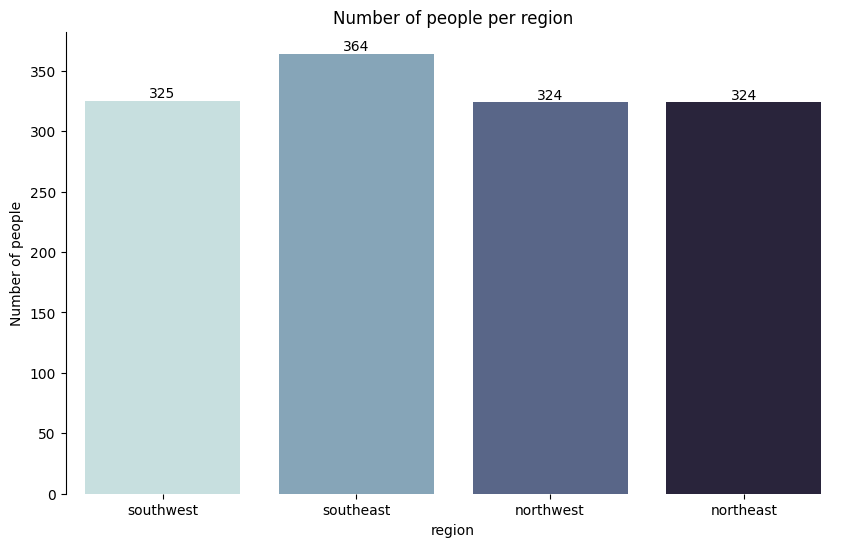

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['region'], palette = "ch:start=.2,rot=-.3")
plt.ylabel('Number of people')
plt.title('Number of people per region')

for i in ax.containers:
  ax.bar_label(i)


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.show()

As barras representam quatro regiões distintas: sudoeste (southwest), sudeste (southeast), noroeste (northwest) e nordeste (northeast).

Observações baseadas no gráfico:

- **Distribuição por Região**: Há uma distribuição relativamente equilibrada entre as regiões noroeste e nordeste, ambas com 324 pessoas. No entanto, a região sudeste tem a maior quantidade de pessoas com 364, enquanto a região sudoeste tem a menor, com 325 pessoas. Essa diferença pode ser relevante se, por exemplo, as regiões tiverem diferentes perfis de risco de saúde ou acesso a cuidados médicos.

- **Implicações para o Seguro Saúde**: A localização geográfica pode influenciar as taxas de seguro saúde devido a fatores como o custo de vida, disponibilidade de serviços de saúde, prevalência de certas doenças e estilos de vida regionais. Um maior número de segurados em uma região pode indicar uma maior demanda por serviços de saúde ou uma população com características específicas que afetam as previsões de custos de saúde.


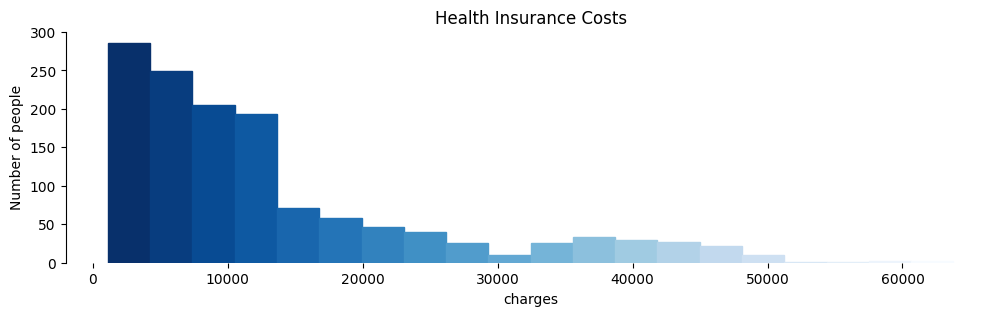

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 3))

# Create histogram using Seaborn
sns.histplot(df['charges'], bins=20, cumulative=False, ax=ax)

# Normalize the heights of the patches to get values between 0 and 1
max_height = max([p.get_height() for p in ax.patches])
norm = plt.Normalize(0, max_height)

# Create a colormap
cmap = plt.cm.get_cmap('Blues_r')


# Determine the x-axis positions of the bars (center of each bin)
bin_centers = 0.5 * (np.array([p.get_x() for p in ax.patches]) +
                     np.array([p.get_width() for p in ax.patches]) +
                     np.array([p.get_x() for p in ax.patches]))

# Normalize these positions to get values between 0 and 1
norm = plt.Normalize(min(bin_centers), max(bin_centers))

# Apply the colormap to each patch (bar) based on x-axis position
for p, x in zip(ax.patches, bin_centers):
    p.set_color(cmap(norm(x)))

# Setting title and showing the plot
plt.title('Health Insurance Costs')
plt.ylabel('Number of people')
# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.show()


Aqui estão algumas observações sobre o gráfico:

1. **Concentração de Custos**: A maior concentração de pessoas encontra-se nos intervalos de custo mais baixos. Isso sugere que a maioria dos clientes do seguro de saúde tem custos mais baixos associados a seus planos, o que pode indicar um perfil de baixo risco ou planos de seguro com cobertura básica.

2. **Cauda Longa**: O histograma tem uma "cauda longa" para a direita, o que indica que há menos pessoas com custos muito altos de seguro de saúde. Isso é típico em dados de seguros onde a maioria dos segurados tem custos baixos, e poucos apresentam custos extremamente altos, possivelmente devido a condições de saúde que requerem tratamentos ou procedimentos caros.

3. **Análise de Outliers**: Se esses custos altos forem muito raros ou inesperados, eles podem ser considerados outliers. Seria importante para a companhia de seguros investigar esses casos mais a fundo para entender as causas dos altos custos e se eles estão relacionados a fraudes, doenças crônicas, ou eventos de saúde de alta gravidade.

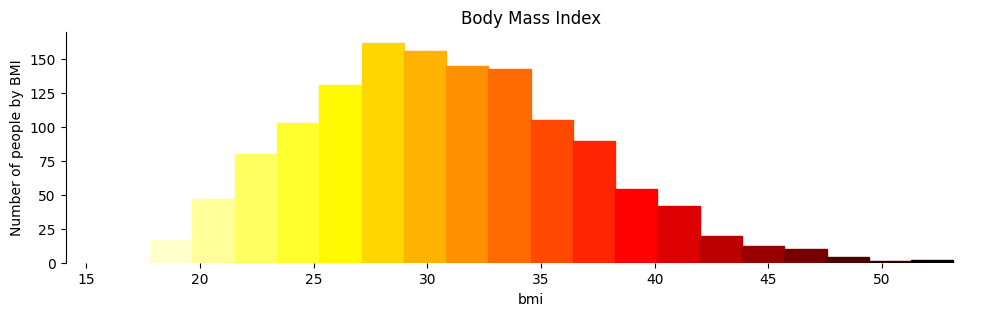

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 3))

# Create histogram using Seaborn
sns.histplot(df['bmi'], bins=20, cumulative=False, ax=ax)

# Normalize the heights of the patches to get values between 0 and 1
max_height = max([p.get_height() for p in ax.patches])
norm = plt.Normalize(0, max_height)

# Create a colormap
cmap = plt.cm.get_cmap('hot')

# Determine the x-axis positions of the bars (center of each bin)
bin_centers = -0.5 * (np.array([p.get_x() for p in ax.patches]) +
                     np.array([p.get_width() for p in ax.patches]) +
                     np.array([p.get_x() for p in ax.patches]))

# Normalize these positions to get values between 0 and 1
norm = plt.Normalize(min(bin_centers), max(bin_centers))

# Apply the colormap to each patch (bar) based on x-axis position
for p, x in zip(ax.patches, bin_centers):
    p.set_color(cmap(norm(x)))

# Setting title and showing the plot
plt.title('Body Mass Index')
plt.ylabel('Number of people by BMI')
# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.show()


Aqui estão algumas observações sobre o gráfico:

1. **Distribuição do IMC**: A distribuição parece normal, com a maior concentração de valores ao redor do centro do gráfico. Isso sugere que a maioria das pessoas tem um IMC que está na faixa de sobrepeso, que é tipicamente definida como um IMC entre 25 e 29,9.

2. **Categorias de IMC**: A cor do histograma muda gradativamente de amarelo para vermelho à medida que o valor do IMC aumenta. Isso indica diferentes categorias de peso, do normal (cor mais clara) ao obeso (cor mais escura). A mudança de cor pode ajudar a identificar rapidamente as áreas de preocupação, como uma alta proporção de indivíduos com sobrepeso ou obesidade.

3. **Riscos para a Saúde**: Um IMC elevado está associado a um risco maior de doenças crônicas, como diabetes tipo 2, hipertensão e doenças cardiovasculares.

4. **Política de Preços**: indivíduos com maior IMC podem ser considerados mais arriscados e, portanto, podem ter custos mais altos.

**Nota:**
* **IMC menor que 18,5**, está dentro da faixa de peso abaixo do normal.
* **IMC de 18,5 a 24,9**, está dentro da faixa de peso saudável.
* **IMC de 25,0 a 29,9**, está dentro da faixa de sobrepeso.

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


Correlation Matrix:


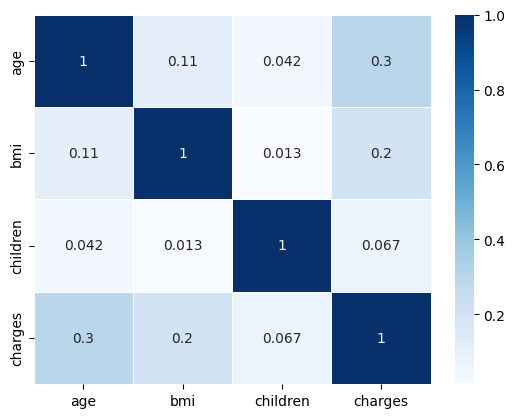

In [ ]:
# Correlation Matrix
sns.heatmap(df.corr(), lw= .4, cmap='Blues', annot=True)
print('Correlation Matrix:')
plt.show()

1. **Idade**: Há uma correlação positiva moderada (0.298) entre idade e custos, sugerindo que indivíduos mais velhos tendem a incorrer em custos de seguro mais altos.
2. **IMC**: IMC tem uma correlação positiva mais baixa (0.198) com custos. Embora não tão forte quanto a idade, um IMC mais alto pode

 estar associado a custos de seguro mais altos.
3. **Filhos**: O número de filhos tem uma correlação muito baixa com custos.
4. **Fumar**: O instantâneo dos dados não inclui um valor de correlação para fumar, mas tipicamente é um fator significativo nos custos de seguro.

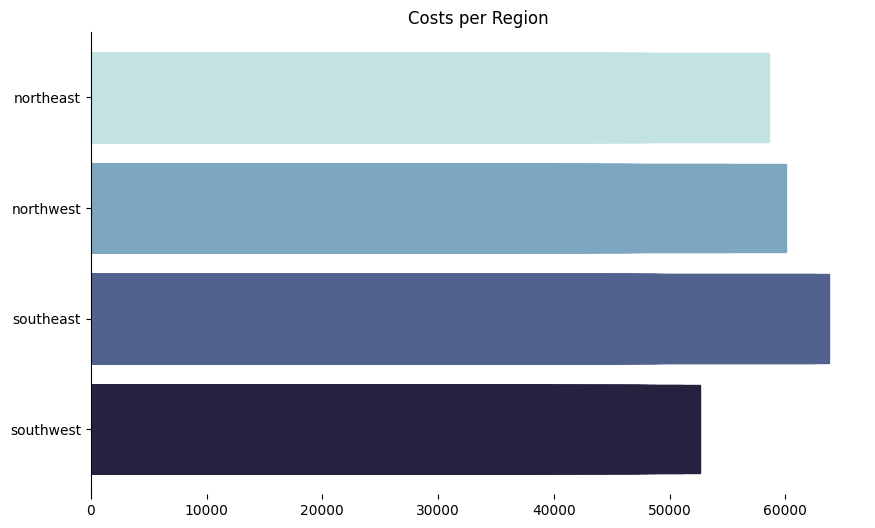

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit the label encoder
label_encoder = LabelEncoder()
df['region_encoded'] = label_encoder.fit_transform(df['region'])

# Create a seaborn color palette
palette = sns.color_palette('ch:start=.2,rot=-.3', as_cmap=True)

# Normalize the encoded region values to get values between 0 and 1
norm = plt.Normalize(df['region_encoded'].min(), df['region_encoded'].max())

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df['region'], df['charges'], color='r')

# Apply the palette colors to each bar based on the normalized region values
for bar, encoded_region in zip(bars, df['region_encoded']):
    bar.set_color(palette(norm(encoded_region)))

plt.title('Costs per Region')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


1. **Distribuição dos Custos**: O custo mais elevado está associado à região sudoeste, seguido pela região sudeste. Nordeste e noroeste apresentam custos menores em comparação com as outras duas regiões.

2. **Análise Regional**: A distribuição desigual dos custos sugere variações regionais que podem ser devidas a diferenças nos preços dos serviços de saúde, prevalência de determinadas doenças, ou diferenças nos planos de saúde disponíveis.


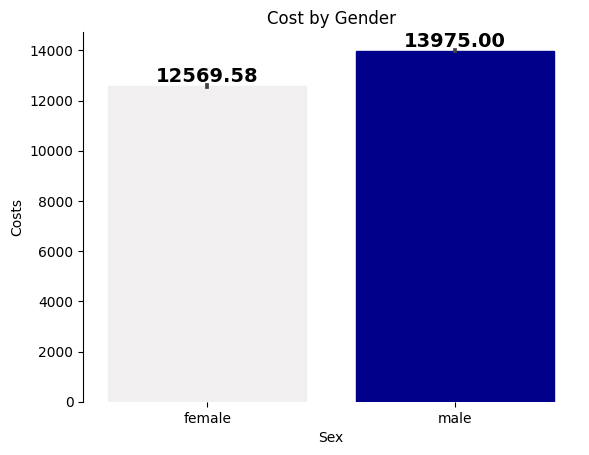

In [15]:
# subplot
fig, ax = plt.subplots()

#  seaborn
ax = sns.barplot(x=df['sex'], y=df['charges'], ci=5)

# Titles
plt.title('Cost by Gender')
plt.xlabel('Sex')
plt.ylabel('Costs')

# Colors
bar_colors = ['darkblue' if x == 'male' else '#F1EFEF' for x in df['sex'].unique()]
for bar, color in zip(ax.patches, bar_colors):
    bar.set_color(color)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add quantity
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=14)

plt.show()

1. **Diferença de Custos por Gênero**: O gráfico indica que o custo médio para o gênero masculino é maior do que para o feminino. O valor para o gênero masculino é de 13.975,00, enquanto para o feminino é de 12.569,58.

2. **Implicações para a Seguradora**: A diferença nos custos pode ser relevante para a estratégia de precificação da seguradora. Pode ser necessário investigar se as diferenças são devidas a fatores como frequência de uso de serviços, tipos de procedimentos mais comuns em cada gênero ou diferenças na idade média dos segurados.

3. **Considerações de Risco**: Se os custos mais elevados estiverem associados a maiores riscos de saúde ou a maior frequência de condições crônicas, a seguradora pode querer adaptar suas políticas de cobertura ou programas de prevenção específicos para cada gênero.


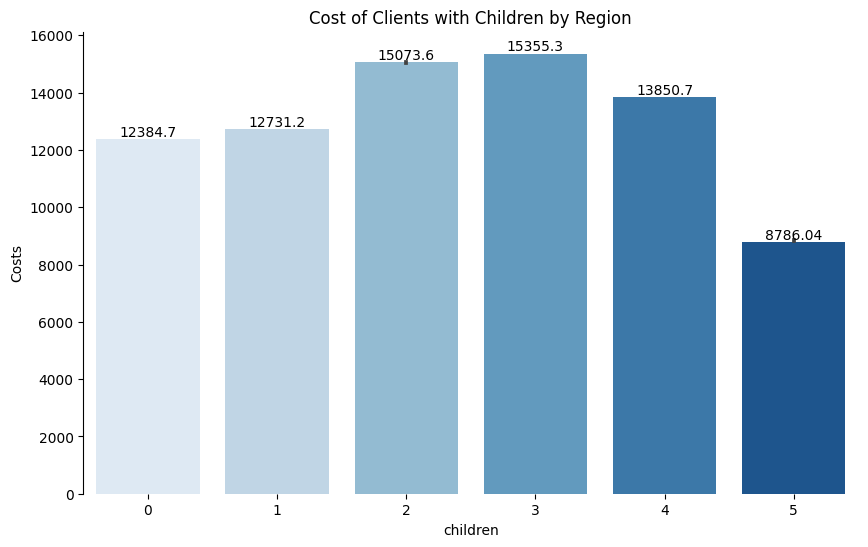

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'region' is the column with region names and 'count' is the count of people
sns.barplot(x = df['children'], y = df['charges'], ci= 1, palette='Blues')
plt.ylabel('Costs')
plt.title('Cost of Clients with Children by Region')

# Labeling the bars with their respective counts
for container in ax.containers:
    ax.bar_label(container)

# Removing unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False) # Usually, we want to keep the bottom spine visible for the x-axis.
ax.spines['right'].set_visible(False)

plt.show()


Algumas observações podem ser feitas:

1. **Variação de Custos**: Existe uma variação nos custos totais em relação ao número de crianças. Clientes sem crianças e com uma criança têm custos semelhantes, enquanto aqueles com dois e três filhos apresentam um aumento nos custos. Curiosamente, o custo diminui para clientes com quatro crianças e cai significativamente para clientes com cinco crianças.

2. **Interpretação dos Dados**: Este padrão pode indicar que certos planos de seguro de saúde oferecem vantagens ou descontos para famílias maiores, ou pode refletir diferenças no tipo de cobertura escolhida por famílias de diferentes tamanhos.

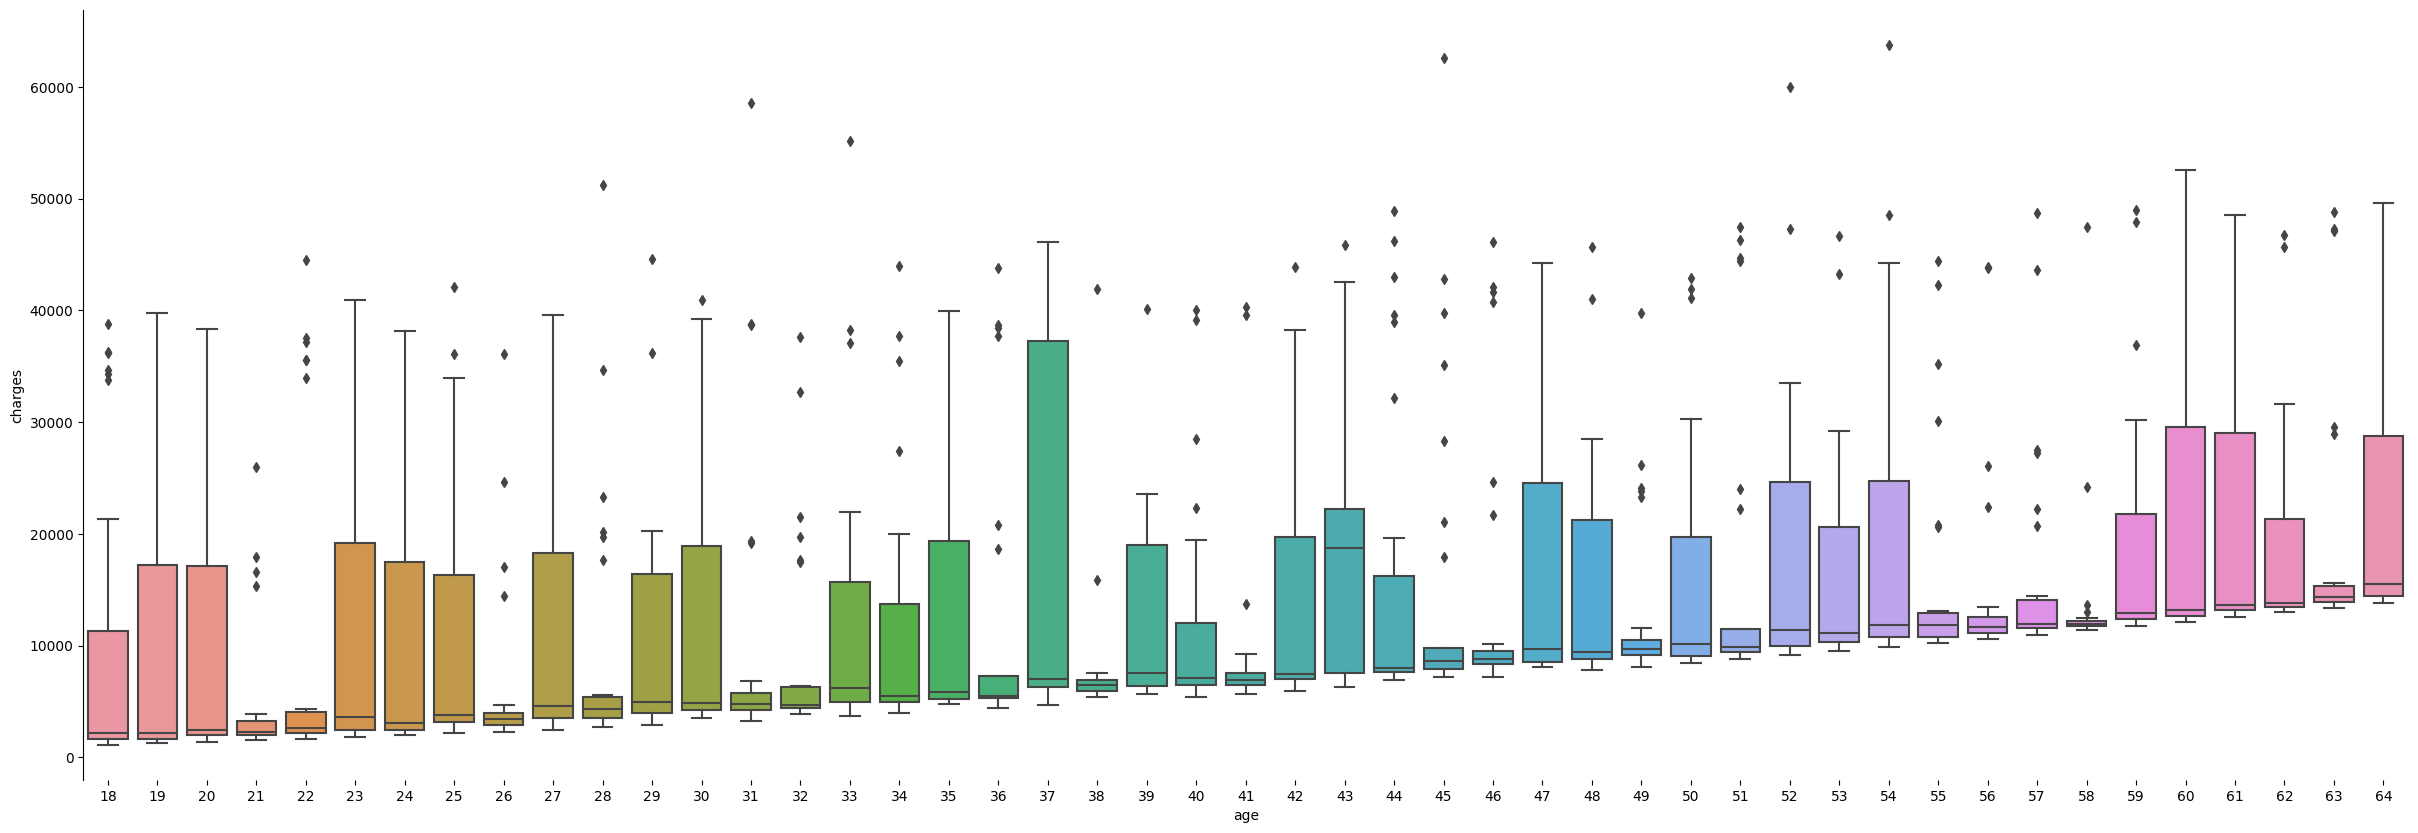

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x = df['age'],y =df['charges'], ax=ax)
plt.title('')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

1. **Aumento de Custos com a Idade**: É visível que, conforme a idade aumenta, os custos medianos de seguro de saúde tendem a subir. Isso é particularmente notável a partir dos 33 anos, onde as medianas e os quartis superiores aumentam significativamente.

2. **Dispersão e Outliers**: Há uma grande dispersão de custos em quase todas as idades, indicada pelos pontos que representam outliers e pelas caudas longas (whiskers) das caixas. Especialmente em idades mais avançadas, a variação dos custos é mais acentuada, sugerindo uma diferenciação maior nos planos de saúde ou no uso de serviços médicos.

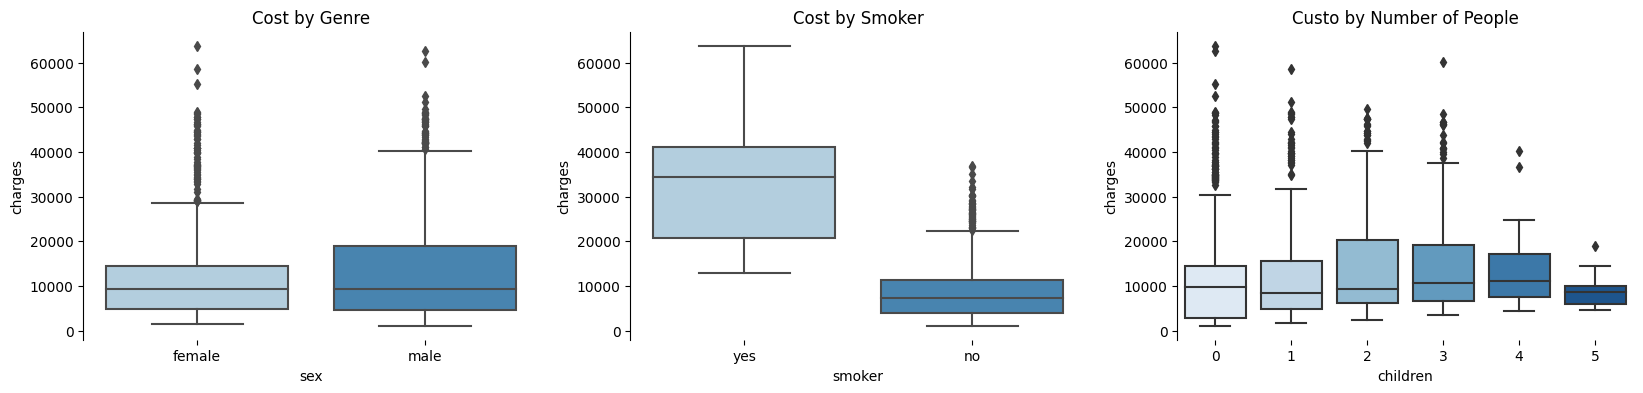

In [17]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
sns.boxplot(x = df['sex'],y =df['charges'], ax=ax[0], palette = 'Blues')
ax[0].set_title('Cost by Genre')

sns.boxplot(x = df['smoker'],y =df['charges'], ax=ax[1], palette = 'Blues')
ax[1].set_title('Cost by Smoker')

sns.boxplot(x = df['children'],y =df['charges'], ax=ax[2], palette = 'Blues')
ax[2].set_title('Custo by Number of People')

ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)

plt.show()

1. **Custo por Gênero**: Observa-se que a mediana de custo para o gênero masculino é ligeiramente mais alta do que para o feminino, e a distribuição de custos para homens mostra uma variação maior, indicado pelos outliers acima do terceiro quartil.

2. **Custo por Fumante**: Há uma diferença significativa de custos quando comparamos fumantes e não fumantes. Os fumantes têm uma mediana de custo substancialmente mais alta e uma distribuição de custos mais ampla, evidenciando o impacto do tabagismo nos custos de seguro de saúde.

3. **Custo por Quantidade de Crianças**: Os custos tendem a aumentar com o número de crianças, mas não de forma linear. Surpreendentemente, clientes sem filhos e com cinco filhos apresentam os custos medianos mais baixos, enquanto aqueles com três filhos mostram a maior mediana.

In [ ]:
import pandas as pd


average_costs_by_region = df.groupby('region')['charges'].mean()
highest_cost_region = average_costs_by_region.idxmax()
highest_cost_value = average_costs_by_region.max()

print("Region with the highest average cost:", highest_cost_region)
print("Average cost in this region:", highest_cost_value)


Region with the highest average cost: southeast
Average cost in this region: 14735.41143760989


1. **Análise Regional de Custos**: A região sudeste apresenta o custo médio mais alto de seguro de saúde, o que pode refletir uma série de fatores, como prevalência de doenças crônicas, custos mais elevados de serviços médicos, ou menor concorrência entre os provedores de saúde na região.

2. **Estratégia de Seguradora**: Para seguradoras, esse insight é fundamental para ajustar estratégias de precificação e avaliar a necessidade de produtos de seguro diferenciados que possam atender às particularidades dessa região, buscando equilibrar risco e cobertura.

What are the much costs by region?


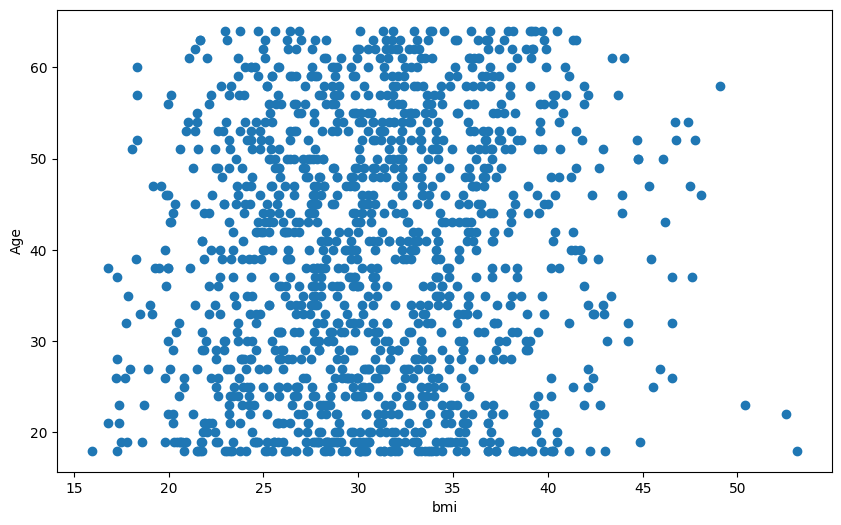

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter('bmi','age', data = df)
plt.title('')
plt.ylabel('Age')
plt.xlabel('bmi')
plt.show()

1. **Distribuição de IMC por Idade**: Não parece haver uma correlação clara entre IMC e idade neste gráfico. Os pontos estão dispersos por toda a faixa de IMC para quase todas as idades. Isso sugere que o IMC varia independentemente da idade entre os indivíduos considerados.

2. **Concentração de Dados**: A maior densidade de pontos encontra-se na faixa de IMC entre aproximadamente 25 e 35, que abrange os limites entre peso normal, sobrepeso e o início da obesidade. Isso indica que uma proporção significativa da população analisada está nesse intervalo de IMC.


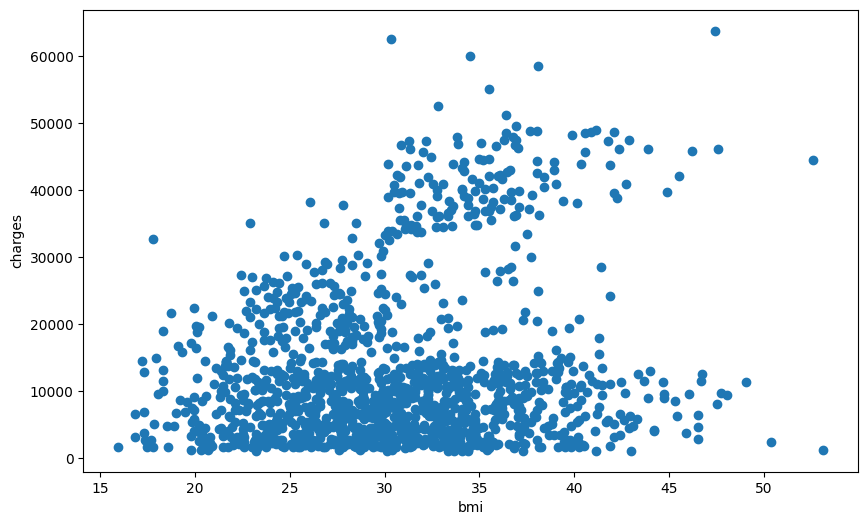

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter('bmi','charges', data = df)
plt.title('')
plt.ylabel('charges')
plt.xlabel('bmi')
plt.show()

1. **Análise de Dados**: Os pontos de dados estão espalhados, indicando uma possível relação entre o IMC e os custos associados ao seguro de saúde. A dispersão indica que, conforme o IMC aumenta, há uma tendência de aumento nos custos de seguro de saúde, o que faz sentido do ponto de vista do risco de doenças associadas ao IMC mais elevado.


In [ ]:
# Outliers in charges column
Q3 = df['charges'].quantile(0.75)
Q1 =  df['charges'].quantile(0.25)
IQR = Q3 - Q1
print('IQR:', IQR)
iqr_upper = Q3 + 1.5 * IQR
iqr_lower = Q1 - 1.5 * IQR

print('\nOutliers:')
print('IQR_upper:',iqr_upper)
print('IQR_lower:',iqr_lower)

IQR: 11911.37345

Outliers:
IQR_upper: 34524.777625
IQR_lower: -13120.716174999998


* O **Intervalo Interquartil (IQR)** é de 11.899,62. Valores acima de 34.489,35 ou abaixo de -13.109,15 são considerados outliers para os custos ('charges').
* Nesse caso existência de um limite inferior negativo para outliers não é necessária, já que custos não podem ser negativos.

In [ ]:
# Values < 13.67
lowercharges_outliers = df.charges <= -13109.15
# Values > 34.489,35
uppercharges_outliers = df.charges >= 34489.35
print(lowercharges_outliers.sum())
print(uppercharges_outliers.sum())

0
139


- Como esperado, todos os outliers são acima de $34.489,35.

In [ ]:
# Outliers in bmi column
Q3 = df['bmi'].quantile(0.75)
Q1 =  df['bmi'].quantile(0.25)
IQR = Q3 - Q1
print('IQR:', IQR)
iqr_upper = Q3 + 1.5 * IQR
iqr_lower = Q1 - 1.5 * IQR

print('\nOutliers:')
print(f'IQR_upper:',round(iqr_upper, 2))
print('IQR_lower:', round(iqr_lower, 2))

IQR: 8.410000000000004

Outliers:
IQR_upper: 47.32
IQR_lower: 13.67


- Os valores de IMC acima de 47.32 podem indicar casos de obesidade mórbida, que é um fator de risco significativo para várias condições de saúde e pode impactar os custos de seguro de saúde devido à maior necessidade de tratamentos médicos e procedimentos de saúde.
- Valores de IMC abaixo de 13.67 são mais raros, requerendo verificação adicional.

In [ ]:
# Values < 13.67
lower_outliers = df.bmi <= 13.67
upper_outliers = df.bmi >= 47.32
print(lower_outliers.sum())
print(upper_outliers.sum())

0
9


- Não há nenhum valor abaixo de 13.67 e 9 valores acima do IMC



In [ ]:
df.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

**O Intervalo Interquartil (IQR)** é de 8.41000. Valores acima de 47.32 ou abaixo de 13.67 são considerados outliers para o bmi ('charges')

In [18]:
# outliers in other columns
def count_outliers(column):
    """Count the number of outliers in a column using the IQR method."""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number)

# Count outliers for each numeric column
outliers_count = numeric_cols.apply(count_outliers)

# Convert to DataFrame for display
outliers_count_df = outliers_count.reset_index()
outliers_count_df.columns = ['Variable', 'Number of Outliers']
outliers_count_df

,Variable,Number of Outliers
0,age,0
1,bmi,9
2,children,0
3,charges,139
4,region_encoded,0




- Não há outliers na variável 'age' e 'children', o que indica uma distribuição relativamente uniforme dessas variáveis.
- Existem 9 outliers na variável 'bmi', que indicam casos de IMC extremamente alto.
- Há 139 outliers na variável 'charges', o que sugere uma grande variação nos custos de seguro de saúde, possivelmente devido a casos de alta complexidade médica ou procedimentos caros.

# **4. Modelagem**

## Usando o PyCaret

O PyCaret é uma biblioteca de automação de machine learning para Python que permite realizar várias etapas do processo de modelagem de machine learning de forma eficiente e automatizada.

In [ ]:
# Installing PyCaret
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta

In [ ]:
# Installing mlflow
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
# Import pycaret.regression
# Creating pipeline
from pycaret.regression import *
setup_data = setup(
    data=df,
    target='charges',
    normalize = True,
    transformation=True,
    transform_target=True,
    log_experiment = True,
    train_size=0.9,
    session_id=123,
    experiment_name = 'Charges_01'
    )

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1337, 7)"
4,Transformed data shape,"(1337, 10)"
5,Transformed train set shape,"(1203, 10)"
6,Transformed test set shape,"(134, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


- **Configuração da Sessão**: A sessão foi iniciada com o ID 123, indicando que é possível rastrear e reproduzir a configuração exata do experimento.

- **Dados de Entrada**:O conjunto de dados original possui 1337 instâncias com 7 características cada.
   - Após o pré-processamento, o conjunto de dados de treino foi transformado para ter 1203 instâncias.
   - O conjunto de dados de teste foi transformado para ter 134 instâncias.
   - Existem 2 características ordinais, 3 numéricas e 3 categóricas.

- **Pré-processamento**: Foi aplicado o pré-processamento dos dados (`Preprocess = True`), que é crucial para garantir a qualidade dos dados antes da modelagem.
   - A imputação de dados ausentes é do tipo simples: média para dados numéricos e moda para dados categóricos.
   - A codificação one-hot foi aplicada nas variáveis categóricas, com um limite máximo de 25 categorias por variável.

- **Validação Cruzada**: A técnica de validação cruzada utilizada é KFold com 10 dobras (folds), o que permite uma avaliação robusta do modelo.

- **Recursos Computacionais**: O experimento foi configurado para usar todos os CPUs disponíveis (CPU Jobs = -1) e não utilizar GPU.


In [ ]:
# Split data

X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1203, 6)
(1203,)
(134, 6)
(134,)


In [ ]:
# Compare different models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2154.3710,21562841.5149,4597.3354,0.8417,0.3766,0.1751,0.2410
rf,Random Forest Regressor,2257.2567,22238374.0668,4685.5212,0.8359,0.4041,0.2044,0.6900
lightgbm,Light Gradient Boosting Machine,2399.5274,22767151.1357,4732.5110,0.8325,0.4071,0.2060,0.6110
ada,AdaBoost Regressor,3251.8494,23402284.2141,4816.0715,0.8281,0.4796,0.4318,0.1570
et,Extra Trees Regressor,2354.5959,25517445.8643,5000.0152,0.8124,0.4337,0.2220,0.4130
xgboost,Extreme Gradient Boosting,2745.4153,27592164.6000,5217.9583,0.7965,0.4387,0.2494,0.2780
knn,K Neighbors Regressor,3147.8701,30734093.6000,5490.3199,0.7761,0.4350,0.2671,0.1560
dt,Decision Tree Regressor,3070.0440,43369752.5879,6522.2868,0.6822,0.5292,0.3553,0.1490
br,Bayesian Ridge,4048.8429,59070986.0633,7616.4942,0.5736,0.4410,0.2698,0.2270
lr,Linear Regression,4052.2141,59252200.5021,7625.4342,0.5725,0.4409,0.2691,0.8870


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

- **MAE (Mean Absolute Error)**:
   - Varia entre 1725.7338 e 2764.8552 por fold.
   - A média do MAE é 2154.3710, indicando que em média o modelo errou por aproximadamente 2154 unidades monetárias nas previsões.
   - O desvio padrão do MAE é relativamente baixo (332.0625), o que implica em consistência nas previsões do modelo entre os diferentes folds.

- **MSE (Mean Squared Error)**:
   - Varia significativamente entre os folds, de 12959884.1965 a 33652076.2623.
   - A média do MSE é bastante alta (21562841.5149), sugerindo que existem alguns erros de previsão grandes que estão aumentando a média do erro quadrático.
   - O desvio padrão do MSE (6026097.6844) é substancial, refletindo a variabilidade nos erros de previsão entre os folds.

- **RMSE (Root Mean Squared Error)**:
   - O RMSE segue uma tendência semelhante ao MSE, variando de 3599.9839 a 5808.3218.
   - A média do RMSE é 4597.3354, o que é consistente com os valores elevados do MSE e sugere que há variações significativas nos erros de previsão.

- **R2 (Coeficiente de Determinação)**:
   - O R2 varia de 0.7514 a 0.8981 entre os folds, com uma média de 0.8417.
   - Isso indica que o modelo é capaz de explicar, em média, 84.17% da variância dos custos de seguro saúde, o que é considerado um bom resultado para a maioria dos contextos de regressão.
   - O desvio padrão do R2 é baixo (0.0517), sugerindo que o modelo tem um desempenho bastante estável em termos de explicar a variância dos dados entre os diferentes conjuntos de dados de teste.

- **RMSLE (Root Mean Squared Logarithmic Error)**:
   - O RMSLE é consistentemente baixo em todos os folds, com uma média de 0.3766 e um desvio padrão de 0.0452, o que é bom, pois indica que o modelo lida bem com a magnitude dos erros em uma escala logarítmica.

- **MAPE (Mean Absolute Percentage Error)**:
   - O MAPE varia de 0.1530 a 0.2113 entre os folds.
   - A média do MAPE é 0.1751, o que significa que o modelo erra, em média, em 17.51% nas previsões percentuais dos custos do seguro saúde.

Em resumo, o modelo parece robusto e confiável, mas uma investigação adicional sobre os erros poderia levar a melhorias significativas, o que é importante em um contexto de seguro de saúde, onde as previsões precisas são cruciais para o gerenciamento de riscos e a definição de preços.

In [ ]:
# Verifying the best model
print(best_model)

GradientBoostingRegressor(random_state=123)


In [ ]:
# Verifying the models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# Instancing the model
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1725.7338,12959884.1965,3599.9839,0.8837,0.3590,0.1861
1,2086.6390,21107170.5632,4594.2541,0.8217,0.3597,0.1873
2,2293.6362,22685484.3353,4762.9281,0.8653,0.3583,0.1709
3,1855.5986,16254585.4182,4031.6976,0.8907,0.3440,0.1761
4,1679.7457,13542856.7276,3680.0621,0.8981,0.3525,0.1674
5,2764.8552,32356072.2632,5688.2398,0.7604,0.4827,0.2113
6,2304.6864,22517564.5065,4745.2676,0.7514,0.3575,0.1698
7,2065.0693,19727041.0248,4441.5134,0.8804,0.3433,0.1530
8,2194.3919,25008218.3294,5000.8218,0.8645,0.3620,0.1539


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


 O modelo de regressão está desempenhando bem na tarefa de prever custos de seguro de saúde, mas há espaço para melhorias, principalmente na gestão de erros e na consistência das previsões entre diferentes segmentos dos dados.

Com base nesses insights, vamos otimizar esse modelo.

In [ ]:
# Paramters
print(gbr)

GradientBoostingRegressor(random_state=123)


In [ ]:
# Print of the best models
model_parameters = gbr.get_params()
model_parameters


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Adjusting the model to more robust in the outliers
tuned_gbr = tune_model(gbr, custom_grid={
    'max_depth': [3, 5, 7, 10],  # Profundidades máximas das árvores
    'learning_rate': [0.01, 0.05, 0.1],  # Taxas de aprendizado
    'n_estimators': [100, 200, 500],  # Número de árvores
    'subsample': [0.8, 0.9, 1],  # Proporção de subsample para treinamento de cada árvore
    'min_samples_split': [10, 20, 30],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias em cada folha
}, optimize='R2')  # Optimize pode ser MAE, RMSE, ou qualquer outra métrica disponível

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1821.7369,14186540.6843,3766.5024,0.8727,0.3759,0.2022
1,1992.0930,20770243.6729,4557.4383,0.8246,0.3630,0.1825
2,2228.1771,22159201.4053,4707.3561,0.8684,0.3653,0.1716
3,1787.5489,15934634.4360,3991.8209,0.8928,0.3574,0.1793
4,1711.4933,14169147.2211,3764.1928,0.8934,0.3614,0.1635
5,2556.5741,29717480.5458,5451.3742,0.7800,0.4788,0.1987
6,2329.1673,22476294.5421,4740.9171,0.7518,0.3701,0.1864
7,1982.2197,19526027.0938,4418.8264,0.8816,0.3392,0.1585
8,2181.3893,25081747.1917,5008.1680,0.8641,0.3801,0.1528


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Em resumo, o modelo parece oferecer um bom equilíbrio entre acurácia e consistência, o que é promissor para a aplicação prática no contexto de seguro de saúde.

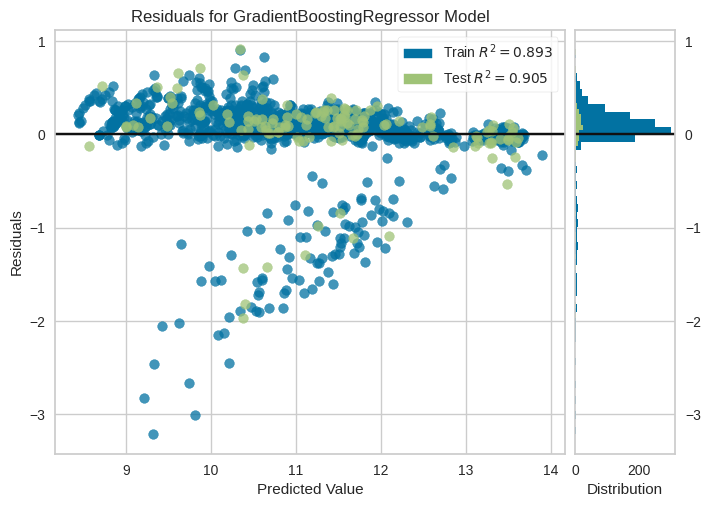

In [ ]:
# Plot Residuals
plot_model(tuned_gbr, plot='residuals')

**Análise do Gráfico de Resíduos:**

O gráfico de Resíduos para o Modelo Regressor de Potencialização Gradiente sugere que os resíduos não estão dispersos aleatoriamente em torno do eixo horizontal, indicando uma possível heteroscedasticidade. Aplicar transformações como logarítmica ou Box-Cox na variável alvo (charges) para estabilizar a variância poderiam auxiliar no tratamento e melhora, porem já utilizamos dessas transformaçõe e nesse projeto optamos por seguir adiante com estes resultados.

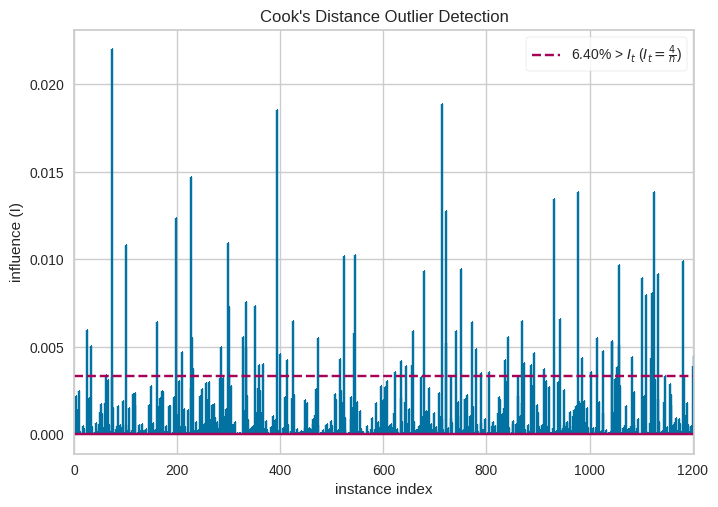

In [ ]:
# Plot Cook's Distance Outlier Detection
plot_model(tuned_gbr, plot='cooks')

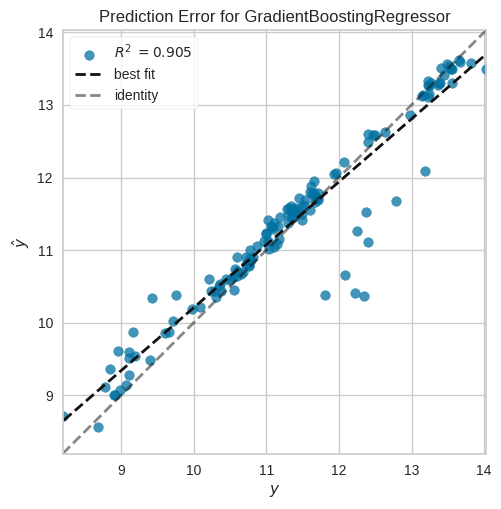

In [ ]:
# Plot the model optimized
plot_model(tuned_gbr, plot="error")

**Detecção de Outliers pela Distância de Cook e o plot de Prediction Error**:

Estes gráficos indicam a presença de pontos influentes que podem ser outliers afetando o desempenho do modelo, e também a maioria dos pontos próximos que representam que o modelo parece ser robusto e confiável para a maioria das previsões, com base no alto valor de R². Investigamos anteriormente a presença de outliers e tratamos automaticamente com o PyCaret, porem ainda sim é possível notar pontos mais distantes. Embora existam estratégias adicionais que poderiam ser exploradas para aprimorar ainda mais a performance do modelo, considerando os objetivos específicos deste projeto e as limitações de tempo estabelecidas, optaremos por não prosseguir com essas melhorias nessa fase.


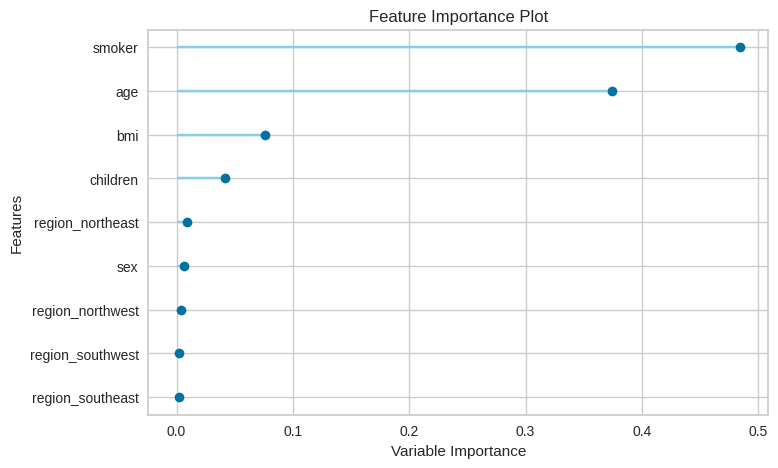

In [ ]:
# Feature Importance
plot_model(tuned_gbr, plot="feature")

- **Variável Mais Importante**: A característica "smoker" (se o indivíduo é fumante ou não) é de longe a mais importante, com uma importância significativamente maior do que todas as outras. Isso indica que o status de fumante tem um grande impacto nos custos do seguro saúde previstos pelo modelo.

- **Idade e BMI**: As características "age" (idade) e "bmi" (índice de massa corporal) também são importantes, mas com menos impacto do que "smoker". Estes são fatores conhecidos que influenciam os custos de saúde e, portanto, são considerados relevantes pelo modelo.

- **Número de Filhos**: A variável "children" (número de filhos dependentes) é considerada na previsão, mas com menor importância do que idade e BMI.
  
- **Avaliação de Risco**: Ao avaliar o risco e definir os preços das apólices, as seguradoras podem querer dar uma atenção especial à idade, ao BMI e ao status de fumante dos indivíduos.

- **Revisão de Dados Demográficos**: O impacto relativamente baixo da região e do gênero sugere que os custos do seguro saúde podem ser mais diretamente influenciados por comportamentos individuais e condições de saúde do que por essas características demográficas.

Vamos testar mais outros 2 modelos afim de descobrir se superam com otimização o modelo Gradient Boosting Regressor

In [ ]:
# Create the model
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3374.6957,20142269.3070,4488.0140,0.8192,0.5677,0.6201
1,3281.0715,20881631.8985,4569.6424,0.8236,0.4702,0.4482
2,3109.9755,23683252.2605,4866.5442,0.8594,0.4880,0.4199
3,2742.1989,19515447.4030,4417.6292,0.8688,0.4311,0.3554
4,3023.0054,15801436.6793,3975.1021,0.8811,0.5113,0.5234
5,3866.7026,29805494.0212,5459.4408,0.7793,0.5357,0.4971
6,3048.1420,23104332.9124,4806.6967,0.7449,0.3933,0.2985
7,2895.9137,23741017.5373,4872.4755,0.8561,0.4126,0.3377
8,3582.0988,27022051.2034,5198.2739,0.8536,0.4790,0.4286


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Como se pode ver, o desempenho foi inferior, mas vamos testar a otimização de parâmetros.

In [ ]:
# # Tuning of the model
tuned_ada = tune_model(ada, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2566.9853,16067476.3928,4008.4257,0.8558,0.4500,0.4051
1,2853.1998,19583128.6761,4425.2829,0.8346,0.4163,0.3575
2,2785.5720,22457109.8149,4738.8933,0.8667,0.4305,0.3309
3,2511.8441,16258702.1381,4032.2081,0.8907,0.4267,0.3524
4,2645.4760,18164633.9289,4261.9988,0.8633,0.4230,0.3643
5,3212.5213,29709291.0352,5450.6230,0.7800,0.4799,0.3467
6,2949.2576,23134781.6846,4809.8630,0.7445,0.4005,0.2917
7,2871.1964,23363219.9167,4833.5515,0.8584,0.4223,0.3460
8,3067.1042,26774900.2219,5174.4469,0.8549,0.4456,0.3378


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Com esse teste é possível ver a melhora do modelo, porem não alcançou o nosso melhor modelo até agora.

In [ ]:
# Create model
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2028.5149,15560865.8228,3944.7263,0.8603,0.4057,0.2240
1,2143.7652,20425664.8797,4519.4762,0.8275,0.3703,0.1993
2,2155.6054,21213258.9703,4605.7854,0.8741,0.3723,0.1901
3,1874.1131,17381658.6940,4169.1316,0.8831,0.4002,0.1964
4,1958.9709,16964935.2411,4118.8512,0.8724,0.3950,0.1933
5,2732.5272,31685761.4333,5629.0107,0.7654,0.5235,0.2517
6,2557.0275,23834651.7385,4882.0745,0.7368,0.3980,0.2227
7,2170.0369,20269680.1888,4502.1862,0.8771,0.3241,0.1850
8,2252.5565,25294063.0593,5029.3203,0.8630,0.4085,0.1832


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

O desempenho do Random Forest foi positivo, mas ainda não melhor que o Gradient Boosting Regressor, vamos tentar otimizar os parâmetros.

In [ ]:
# Tuning model
params = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 4],
    "bootstrap": [True, False],
    "criterion": ['absolute_error']
}

tuned_rf = tune_model(rf, custom_grid=params, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1791.6473,14838772.4463,3852.1127,0.8668,0.3812,0.1869
1,1936.8828,19687587.6101,4437.0697,0.8337,0.3446,0.1625
2,2067.1571,20919847.3776,4573.8220,0.8758,0.3593,0.1655
3,1726.4632,16751359.4654,4092.8425,0.8873,0.3699,0.1545
4,1829.1514,15354714.6233,3918.5092,0.8845,0.3723,0.1781
5,2415.2889,29497642.1509,5431.1732,0.7816,0.4826,0.1860
6,2262.8301,22642961.2221,4758.4621,0.7500,0.3750,0.1796
7,2063.8348,20236397.0845,4498.4883,0.8773,0.3370,0.1583
8,2118.2847,23876487.3388,4886.3573,0.8706,0.3834,0.1455


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Apresentou um bom desempenho, porem não conseguiu alcançar o Gradient Boosting Regressor, portanto vamos seguir com a validação do nosso melhor modelo para esse conjunto de dados.

In [ ]:
# Predict_model of the best model
predict_model(tuned_gbr);


NameError: name 'predict_model' is not defined

# **Validação**


In [ ]:
# Model finalizing
final_gbr = finalize_model(tuned_gbr)

In [ ]:
# Validação do modelo
pred_holdout = predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1580.4529,10765243.3886,3281.0430,0.9422,0.2395,0.1256


In [ ]:
print(final_gbr)

Pipeline(memory=Memory(location=None),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'r...
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=5,
               

## Criação do Modelo de Pipeline

O pipeline é projetado para prever cobranças de seguro de saúde usando um Regressor de Gradient Boosting. Ele começa transformando a variável-alvo para uma distribuição semelhante à normal. Em seguida, lida com valores ausentes em características numéricas e categóricas. Variáveis categóricas são convertidas em um formato legível por máquina usando codificação one-hot. As características são ainda mais transformadas para tornar sua distribuição mais semelhante à gaussiana e são normalizadas. O Regressor de Gradient Boosting, ajustado com parâmetros específicos, é o modelo principal para a previsão. Este pipeline é estruturado para lidar eficazmente com padrões de dados complexos, e sua otimização pode ser gerenciada de forma eficiente usando o PyCaret.

# **Predicting on New Data**


In [ ]:
# Prepare the Database to final test
test = pd.concat([X_test, y_test], axis=1)
test.head()

,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385000,1,no,northwest,2775.192139
547,54,female,46.700001,2,no,southwest,11538.420898
857,25,male,24.129999,0,yes,northwest,15817.985352
1336,21,female,25.799999,0,no,southwest,2007.944946
221,53,female,33.250000,0,no,northeast,10564.884766


In [ ]:
# Unseen Data
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1560.6567,10476588.3859,3236.7558,0.9438,0.2337,0.1236


,age,sex,bmi,children,smoker,region,charges,prediction_label
28,23,male,17.385000,1,no,northwest,2775.192139,4013.200093
547,54,female,46.700001,2,no,southwest,11538.420898,11881.076000
857,25,male,24.129999,0,yes,northwest,15817.985352,16179.056961
1336,21,female,25.799999,0,no,southwest,2007.944946,2112.253365
221,53,female,33.250000,0,no,northeast,10564.884766,11925.636341


In [ ]:
# Graph Interface
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Insights e Recomendações

- **Estratégia de Preços**: Considerar fatores como número de filhos, hábito de fumar e IMC para precificação, dado seu impacto nos custos de saúde.

- **Avaliação Regional**: Analisar diferenças regionais para adaptar estratégias de precificação e cobertura.

- **Modelagem:** O modelo apresenta um bom desempenho geral, com um R2 alto e um MAPE relativamente baixo em dados não vistos, o que é encorajador para sua aplicação prática.
- Estas métricas fornecem uma boa base para confiança na implementação do modelo, mas sempre é recomendado continuar monitorando o desempenho do modelo à medida que novos dados se tornam disponíveis.

**Conclusão:**
Este conjunto de dados oferece insights valiosos para seguradoras que buscam precificar suas apólices de forma mais precisa. Considerar variáveis como hábitos de fumar, IMC, número de filhos, e região pode ajudar a criar estratégias de precificação mais refinadas e eficazes. A análise também sugere a necessidade de programas de saúde preventiva e políticas adaptadas a grupos específicos para gerenciar riscos e custos de maneira eficiente. O modelo otimizado para previsão de custos de seguro de saúde parece ser robusto e confiável, com boas métricas de desempenho em dados de teste não vistos, indicando que está bem ajustado e é capaz de generalizar suas previsões.